![](https://edisonko.design/static/media/pokemon-header-image.01efce57.jpg)

# Giới thiệu

---

#### Mục tiêu của Notebook là phân tích và trực quan hóa các trường thông tin của Pokemon. Dự đoán Pokemon huyền thoại dựa trên các chỉ số chiến đấu. Xác định những loại hình thức tiến hóa sẽ có dựa trên các hình thức tiền tiến hóa. (Ví dụ: từ Pichu dự đoán cho Pikachu, từ Pikachu dự đoán cho Raichu).

#### Nội dung Notebook bao gồm 5 phần:
#### 1. Tìm hiểu Dataset về Pokemon.
#### 2. Phân tích và trực quan hóa thông tin của Pokemon.
#### 3. Dự đoán Pokemon huyền thoại dựa trên các chỉ số chiến đấu.
#### 4. Xác định những loại hình thức tiến hóa sẽ có dựa trên các hình thức tiền tiến hóa.
#### 5. Kết luận.

---

# 1. Khám phá Dataset về Pokemon

---

### Dataset là một Bảng dữ liệu csv, chứa thông tin về những Pokemon được xây dựng là những đối tượng trong game. Bảng bao gồm 15 cột, tương ứng với 15 thuộc tính:

- **ID**: ID cho mỗi Pokemon
- **NAME**: Tên của từng Pokemon
- **TYPE1**: Mỗi Pokemon có ít nhất một hệ/kiểu, xác định điểm mạnh/yếu của Pokemon khi chiến đấu
- **TYPE2**: Một số Pokemon là hệ kép và có hệ/kiểu thứ 2
- **PRE.EVO**: Tiền tiến hóa, hình thức của Pokemon hiện tại **TRƯỚC** khi tiến hóa (có thể có hoặc không)
- **POST.EVO**: Hậu tiến hóa, hình thức của Pokemon hiện tại **SAU** khi tiến hóa (có thể có hoặc không)
- **GENERATION**: Thế hệ của Pokemon khi được giới thiệu
- **TOTAL**: Tổng của tất cả các chỉ số chiến đấu của Pokemon tương ứng
- **HP**: Điểm sức khỏe, xác định mức độ sát thương mà mỗi Pokemon có thể chịu được trước khi ngất xỉu.
- **ATTACK**: Sức mạnh cơ bản của các đòn đánh thường (ví dụ: cào, đấm)
- **DEFENSE**: Phòng thủ, khả năng chống chịu cơ bản trước các đòn đánh thường
- **SP.ATK**: (Special attack - đòn tấn công đặc biệt), sức mạnh cơ bản từ một đòn tấn công đặc biệt (ví dụ: phun lửa, té nước)
- **SP.DEF**: Khả năng chống chịu cơ bản trước một đòn tấn công đặc biệt
- **SPEED**: Tốc độ cơ bản của mỗi Pokemon
- **LEGENDARY**: Xác định xem Pokemon có phải là Pokemon huyền thoại hay không

**Dữ liệu này được tham khảo từ Dataset `Pokemon with stats` trên Kaggle và chỉnh sửa dựa theo trang `pokemondb.net`, bao gồm 720 dòng tương ứng với từng Pokemon.**

Data custom được sử dụng trong notebook: https://www.kaggle.com/datasets/anhhdaoo/720-csv-pokemon-and-images/data

Data tham khảo (Pokemon with stats): https://www.kaggle.com/datasets/abcsds/pokemon/data

**Chi tiết xem các thống kê dưới đây:**

---

In [1]:
# load thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dữ liệu
data = pd.read_csv('/kaggle/input/720-csv-pokemon-and-images/pokemon_data/pokemon_data.csv')

# hiển thị dataset
data

,ID,NAME,TYPE1,TYPE2,PRE.EVO,POST.EVO,GENERATION,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,LEGENDARY
0,1,bulbasaur,grass,poison,NaN,ivysaur,1,318,45,49,49,65,65,45,False
1,2,ivysaur,grass,poison,bulbasaur,venusaur,1,405,60,62,63,80,80,60,False
2,3,venusaur,grass,poison,ivysaur,NaN,1,525,80,82,83,100,100,80,False
3,4,charmander,fire,NaN,NaN,charmeleon,1,309,39,52,43,60,50,65,False
4,5,charmeleon,fire,NaN,charmander,charizard,1,405,58,64,58,80,65,80,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,xerneas,fairy,NaN,NaN,NaN,6,680,126,131,95,131,98,99,True
716,717,yveltal,dark,flying,NaN,NaN,6,680,126,131,95,131,98,99,True
717,718,zygarde,dragon,ground,NaN,NaN,6,600,108,100,121,81,95,95,True
718,719,diancie,rock,fairy,NaN,NaN,6,600,50,100,150,100,150,50,True


In [3]:
# thông tin cơ bản
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          720 non-null    int64 
 1   NAME        720 non-null    object
 2   TYPE1       720 non-null    object
 3   TYPE2       348 non-null    object
 4   PRE.EVO     352 non-null    object
 5   POST.EVO    337 non-null    object
 6   GENERATION  720 non-null    int64 
 7   TOTAL       720 non-null    int64 
 8   HP          720 non-null    int64 
 9   ATTACK      720 non-null    int64 
 10  DEFENSE     720 non-null    int64 
 11  SP.ATK      720 non-null    int64 
 12  SP.DEF      720 non-null    int64 
 13  SPEED       720 non-null    int64 
 14  LEGENDARY   720 non-null    bool  
dtypes: bool(1), int64(9), object(5)
memory usage: 79.6+ KB


In [4]:
# các chỉ số thống kê cơ bản
data.describe()

,ID,GENERATION,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,360.500000,3.319444,417.693056,68.363889,75.076389,70.629167,68.763889,69.151389,65.708333
std,207.990384,1.668045,109.529384,25.862605,29.061414,29.157240,28.828491,26.906847,27.296414
min,1.000000,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,180.750000,2.000000,320.000000,50.000000,53.750000,50.000000,45.000000,50.000000,45.000000
50%,360.500000,3.000000,423.500000,65.000000,74.500000,65.000000,65.000000,65.000000,65.000000
75%,540.250000,5.000000,498.250000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000
max,720.000000,6.000000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000


Trong đó:
- **count**: số lượng giá trị hợp lệ trong mỗi cột (giá trị thiếu hoặc không hợp lệ thường được thay bằng NaN)
- **mean**: trung bình cộng của các giá trị hợp lệ trong mỗi cột
- **std**: độ lệch chuẩn của các giá trị hợp lệ trong mỗi cột
- **min**: giá trị nhỏ nhất trong mỗi cột
- **25%**: giá trị phần tư thứ nhất (Q1) trong mỗi cột
- **50%**: giá trị trung vị (median) trong mỗi cột
- **75%**: giá trị phần tư thứ ba (Q3) trong mỗi cột
- **max**: giá trị lớn nhất trong mỗi cột

---

# 2. Phân tích và trực quan hóa các thông tin của Pokemon sử dụng Matplotlib và Seaborn

In [5]:
# load lại data và các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/kaggle/input/720-csv-pokemon-and-images/pokemon_data/pokemon_data.csv')

### Sự phân bố của tổng các chỉ số (TOTAL)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


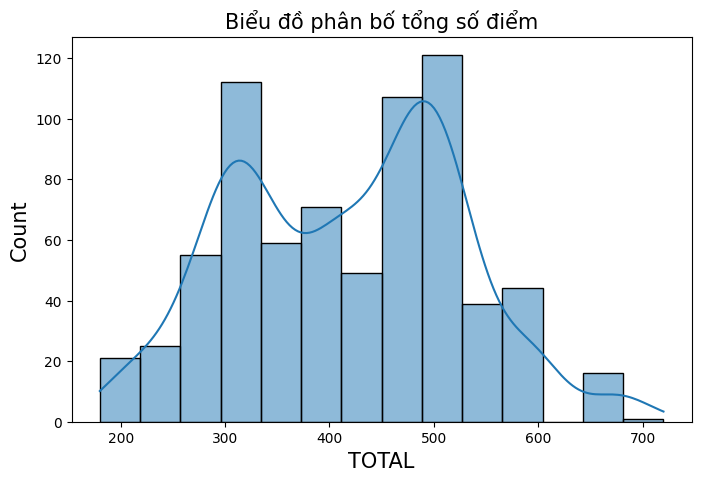

In [6]:
# phân bố của tổng số điểm (TOTAL)

plt.figure(figsize=(8, 5))
sns.histplot(data['TOTAL'], kde=True)
plt.title('Biểu đồ phân bố tổng số điểm', fontsize=15)
plt.xlabel('TOTAL', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Tổng `TOTAL` các chỉ số của Pokemon chủ yếu xấp xỉ ngưỡng `300` và `500`

### Sự phân bố Pokemon theo các hệ

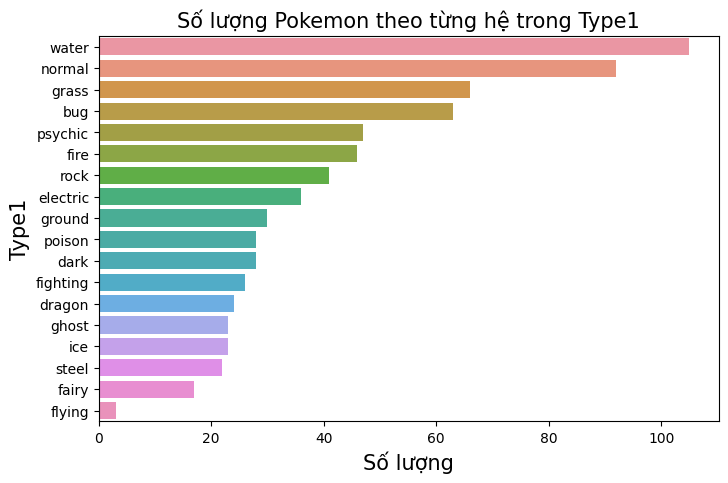

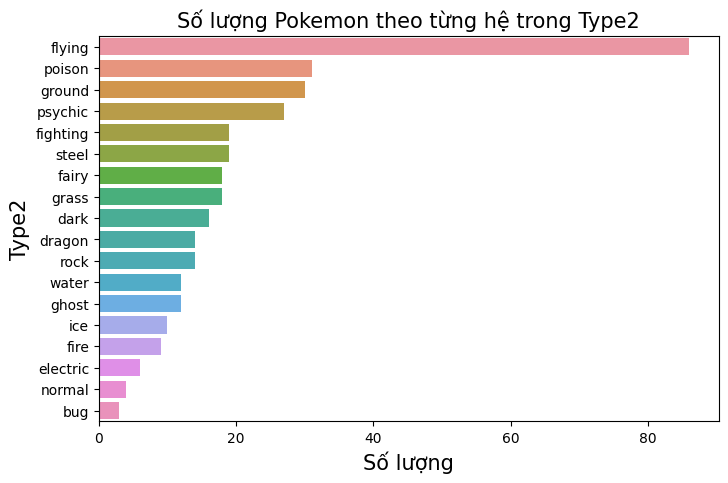

In [7]:
# Số lượng Pokemon của các hệ trong Type1
plt.figure(figsize=(8, 5))
sns.countplot(y='TYPE1', data=data, order=data['TYPE1'].value_counts().index)
plt.title('Số lượng Pokemon theo từng hệ trong Type1', fontsize=15)
plt.xlabel('Số lượng', fontsize=15)
plt.ylabel('Type1', fontsize=15)
plt.show()

# Số lượng Pokemon của các hệ trong Type2
plt.figure(figsize=(8, 5))
sns.countplot(y='TYPE2', data=data, order=data['TYPE2'].value_counts().index)
plt.title('Số lượng Pokemon theo từng hệ trong Type2', fontsize=15)
plt.xlabel('Số lượng', fontsize=15)
plt.ylabel('Type2', fontsize=15)
plt.show()

- TYPE1 có tổng cộng 18 hệ, các Pokemon phân bố nhiều ở các hệ `water`, `normal` và `grass`, trong khi đó sự phân bố ở các hệ `flying`, `fairy` thấp hơn hẳn.
- TYPE2 cũng có 18 hệ khác nhau, tuy nhiên do không phải Pokemon nào cũng là hệ kép, nên số lượng Pokemon có hệ thứ 2 ít hơn so với tổng số Pokemon có trong bảng. Các cột trong biểu đồ TYPE2 cũng vì vậy mà ngắn hơn so với trong biểu đồ TYPE1.
- Trong TYPE2, các Pokemon hệ `flying` chiếm số lượng nhiều nhất (trái ngược với trong biểu đồ TYPE1 với số lượng `flying` thấp nhất), và số lượng Pokemon có hệ `bug` trong TYPE2 là ít nhất.

### Phân tích các chỉ số chiến đấu

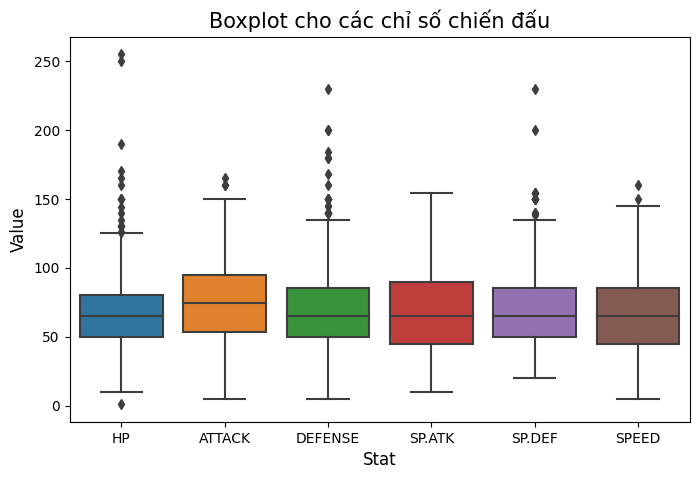

In [8]:
# Biểu đồ hộp cho các chỉ số chiến đấu
plt.figure(figsize=(8, 5))
sns.boxplot(data=data[['HP', 'ATTACK', 'DEFENSE', 'SP.ATK', 'SP.DEF', 'SPEED']])
plt.title('Boxplot cho các chỉ số chiến đấu', fontsize=15)
plt.xlabel('Stat', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()

- Nhận thấy, các chỉ số chiến đấu đều giao động trong khoảng từ `5` đến `150`, và có giá trung bình khoảng `70`.
- Các giá trị ngoại lai lớn ở mỗi chỉ số thường nằm ở những Pokemon có một số chỉ số khác thấp hơn rất nhiều và ngược lại. (ví dụ: Pokemon **`chansey`** có chỉ số `HP` rất cao, lên tới 250, tuy nhiên các chỉ số `ATTACK`, `DEFENSE` lại rất thấp là 5, `SP.ATK` là 35, `SP.DEF` là 105 và `SPEED` là 50)

### So sánh sự phân bố các thế hệ Pokemon

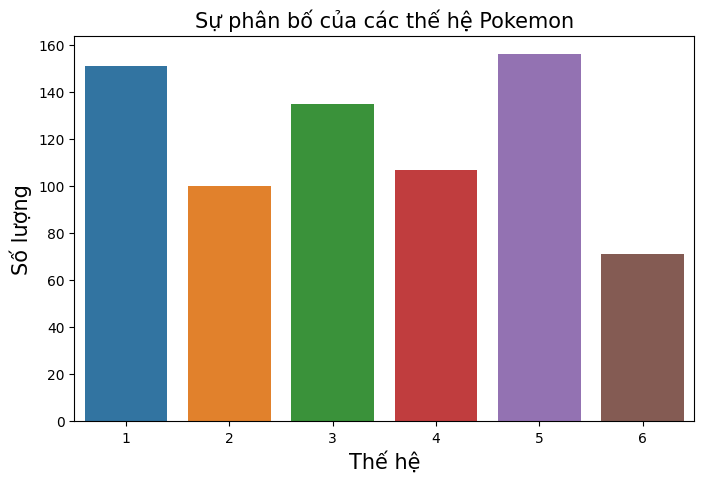

In [9]:
# Biểu đồ phân bố các thế hệ Pokemon
plt.figure(figsize=(8, 5))
sns.countplot(x='GENERATION', data=data)
plt.title('Sự phân bố của các thế hệ Pokemon', fontsize=15)
plt.xlabel('Thế hệ', fontsize=15)
plt.ylabel('Số lượng', fontsize=15)
plt.show()

- Các Pokemon thế hệ 5 và thế hệ 1 chiếm số lượng đông đảo.
- Khi mới ra mắt các tựa game Pokemon, thế hệ Pokemon đầu tiên được tạo ra với số lượng lớn là tất yếu, sau đó giảm dần ở thế hệ 2 và tăng mạnh ở thế hệ thứ 3...
- Thế hệ thứ 5 có số lượng Pokemon nhiều nhất, chứng tỏ nhà sản xuất đã tập trung vào việc tạo ra các Pokemon ở thế hệ này và chúng có những đặc điểm phát triển hơn hẳn các thế hệ trước, và chúng thực sự được ưa chuộng.

### So sánh sự phân bố giữa Pokemon legend và non-legend

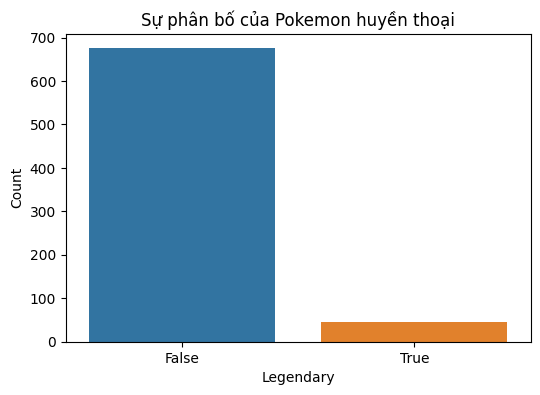

Pokemon huyền thoại: 45
Pokemon thường: 675
Tổng số Pokemon: 720
Tỉ lệ Pokemon huyền thoại: 6.25 %
Tỉ lệ Pokemon thường: 93.75 %


In [10]:
# Biểu đồ phân bố Pokemon huyền thoại và không huyền thoại
plt.figure(figsize=(6, 4))
sns.countplot(x='LEGENDARY', data=data)
plt.title('Sự phân bố của Pokemon huyền thoại')
plt.xlabel('Legendary')
plt.ylabel('Count')
plt.show()

# Thống kê tỉ lệ Pokemon huyền thoại và không huyền thoại
legendary_count = data['LEGENDARY'].sum()
non_legendary_count = len(data) - legendary_count
total_count = len(data)
print("Pokemon huyền thoại:", legendary_count)
print("Pokemon thường:", non_legendary_count)
print("Tổng số Pokemon:", total_count)
print("Tỉ lệ Pokemon huyền thoại:", (legendary_count / total_count) * 100, "%")
print("Tỉ lệ Pokemon thường:", (non_legendary_count / total_count) * 100, "%")

Pokemon `legendary` thường là những Pokemon hiếm và có những chỉ số chiến đấu ưu tú. Đặc biệt, chúng là độc nhất vô nhị do không có bất kì hình thức tiền tiến hóa hay hậu tiến hóa nào. Cũng chính vì vậy mà số lượng Pokemon `legendary` được giới thiệu trong mỗi thế hệ là rất ít, tỉ lệ chênh lệch giữa Pokemon `legendary` và `non-legendary` cũng rất lớn


---
# 3. Dự đoán Pokemon huyền thoại dựa trên các chỉ số chiến đấu, sử dụng các mô hình: Gradient Boosting, Random Forest, KNN, SVM, Logistic Regression, Neural Network.

- `Gradient Boosting Classifier`: xây dựng mô hình dự đoán bằng cách kết hợp nhiều cây quyết định nhỏ (weak learners), và tối ưu hóa mô hình bằng cách lặp lại việc thêm cây quyết định mới, mỗi cây học từ lỗi của cây trước đó bằng cách sử dụng `gradient descent`.

- `RandomForestClassifier`: tạo ra một `rừng` các cây quyết định ngẫu nhiên từ các tập con khác nhau của tập huấn luyện. Mỗi cây quyết định sẽ dự đoán kết quả, và Random Forest sẽ lấy kết quả dự đoán trung bình hoặc đa số phiếu để đưa ra dự đoán cuối cùng.

- `K-Nearest Neighbors (KNN)`: xác định nhãn của một điểm dữ liệu mới dựa trên nhãn của `k` điểm dữ liệu gần nhất trong không gian đặc trưng. Khoảng cách thường được tính bằng khoảng cách Euclidean. KNN không có giai đoạn huấn luyện thực sự, mà chỉ lưu lại toàn bộ dữ liệu huấn luyện và tìm kiếm điểm gần nhất khi có yêu cầu dự đoán.

- `Support Vector Machine (SVM)`: tìm một siêu phẳng tốt nhất để phân chia các điểm dữ liệu của hai lớp trong không gian đặc trưng. Nó tối ưu hóa lề giữa các điểm dữ liệu gần nhất của hai lớp (các vector hỗ trợ) và siêu phẳng. Có thể mở rộng SVM để xử lý các bài toán không tuyến tính bằng cách sử dụng các hạt nhân (kernel).

- `Logistic Regression (Hồi quy Logistic)`: sử dụng hàm `logistic` (sigmoid) để ước lượng xác suất của biến phụ thuộc. Nó tính toán trọng số cho các đặc trưng đầu vào và áp dụng một hàm sigmoid để chuyển đổi các giá trị này thành xác suất trong khoảng từ 0 đến 1. Dựa trên ngưỡng (thường là 0.5), mô hình sẽ phân loại đầu vào thành một trong hai nhãn.

- `Neural Network (Mạng nơ-ron)`: bao gồm các lớp `nơ-ron` (neurons) kết nối với nhau. Mỗi nơ-ron thực hiện các phép tính số học đơn giản và kích hoạt một hàm phi tuyến. Mạng nơ-ron học bằng cách điều chỉnh trọng số của các kết nối dựa trên lỗi giữa dự đoán và giá trị thực tế, thông qua một quá trình gọi là `backpropagation` và `gradient descent`.

### Huấn luyện mô hình và đánh giá

In [11]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Đọc dữ liệu
data = pd.read_csv('/kaggle/input/720-csv-pokemon-and-images/pokemon_data/pokemon_data.csv')

# Chuẩn bị dữ liệu
X = data[['GENERATION', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE', 'SP.ATK', 'SP.DEF', 'SPEED']]
y = data['LEGENDARY'].astype(int)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Danh sách các mô hình
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=200), 
    "Neural Network": MLPClassifier(random_state=42, max_iter=300)
}

# Bảng kết quả
results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Train Time (s)": train_time,
        "Predict Time (s)": predict_time
    })

# Chuyển đổi kết quả thành DataFrame
results_df = pd.DataFrame(results)

# Sắp xếp bảng kết quả theo độ chính xác từ cao đến thấp
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

results_df

,Model,Accuracy,Train Time (s),Predict Time (s)
0,Gradient Boosting,0.993056,0.170827,0.002348
1,Random Forest,0.986111,0.247047,0.009401
2,KNN,0.986111,0.002686,0.012270
3,SVM,0.972222,0.006286,0.002124
4,Logistic Regression,0.965278,0.032939,0.001590
5,Neural Network,0.951389,0.494466,0.003232


- Có thể thấy tỉ lệ chính xác của các mô hình huấn luyện là rất cao, lên đến hơn 99%, điều này là do số lượng pokemon huyền thoại (legenadary) trong dataset chiếm số lượng rất nhỏ so với tổng số (tổng số pokemon trong dataset là 720).

- Như đã tìm hiểu ở trên, pokemon huyền thoại ngoài những chỉ số chiến đấu ưu việt còn có một đặc tính là không có hình thức tiến hóa (kể cả tiền tiến hóa hay hậu tiền hóa), chúng không tiến hóa thành loài pokemon khác cũng như không được tiến hóa từ bất kì pokemon nào.

- Trong dữ liệu huấn luyện của các mô hình bên trên mới chỉ xét các chỉ số chiến đấu và thế hệ, chưa xét đến yếu tố tiến hóa, cũng chính vì vậy mà cho dù với 99% tỉ lệ chính xác, thì khi dự đoán một pokemon mới có phải là một legendary hay không cũng sẽ có khả năng sai lệch.

- Với vấn đề này thì mô hình sẽ được tối ưu hơn trong tương lai, để có thể đưa ra dự đoán chính xác hơn cũng như được huấn luyện trên tập dữ liệu đủ lớn.

### Ví dụ sử dụng mô hình để dự đoán một Pokemon có phải là legendary hay không

In [12]:
import pandas as pd

# Ví dụ thông số chiến đấu của một Pokémon mới
new_pokemons = [
    {
        'TYPE1': 'ice',
        'TYPE2': 'flying',
        'GENERATION': 1,
        'TOTAL': 580,
        'HP': 90,
        'ATTACK': 85,
        'DEFENSE': 100,
        'SP.ATK': 95,
        'SP.DEF': 125,
        'SPEED': 85
    },
    {
        'TYPE1': 'fire',
        'TYPE2': 'dragon',
        'GENERATION': 3,
        'TOTAL': 600,
        'HP': 100,
        'ATTACK': 120,
        'DEFENSE': 90,
        'SP.ATK': 150,
        'SP.DEF': 100,
        'SPEED': 80
    },
    {
        'TYPE1': 'electric',
        'TYPE2': '',
        'GENERATION': 1,
        'TOTAL': 320,
        'HP': 35,
        'ATTACK': 55,
        'DEFENSE': 40,
        'SP.ATK': 50,
        'SP.DEF': 50,
        'SPEED': 90
    }
]

# Chuyển dữ liệu thành DataFrame
pokemon_df = pd.DataFrame(new_pokemons)

# Đọc dữ liệu gốc
df = pd.read_csv('/kaggle/input/720-csv-pokemon-and-images/pokemon_data/pokemon_data.csv')

# Đảm bảo các cột đầu vào cho mô hình
columns_needed = ['GENERATION', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE', 'SP.ATK', 'SP.DEF', 'SPEED']

# Duyệt qua từng Pokémon mới để dự đoán
for i, new_pokemon in pokemon_df.iterrows():
    print(f"\n\nPokémon {i+1}:")
    X_new = pd.DataFrame([new_pokemon[columns_needed]])
    for name, model in models.items():
        is_legendary = model.predict(X_new)
        print(f"  {name}: {'True' if is_legendary[0] else 'False'}")
    
    # Kiểm tra xem new_pokemon có tồn tại trong dataset hay không
    match = df[
        (df['TYPE1'] == new_pokemon['TYPE1']) &
        (df['TYPE2'] == new_pokemon['TYPE2']) &
        (df['GENERATION'] == new_pokemon['GENERATION']) &
        (df['TOTAL'] == new_pokemon['TOTAL']) &
        (df['HP'] == new_pokemon['HP']) &
        (df['ATTACK'] == new_pokemon['ATTACK']) &
        (df['DEFENSE'] == new_pokemon['DEFENSE']) &
        (df['SP.ATK'] == new_pokemon['SP.ATK']) &
        (df['SP.DEF'] == new_pokemon['SP.DEF']) &
        (df['SPEED'] == new_pokemon['SPEED'])
    ]
    
    if not match.empty:
        pokemon_name = match.iloc[0]['NAME']
        legendary_status = match.iloc[0]['LEGENDARY']
        print(f"\n  Pokémon '{pokemon_name}' đã tồn tại trong dataset và có legendary status: {'True' if legendary_status else 'False'}")
    else:
        print("\n  Pokémon nằm ngoài dataset")




Pokémon 1:
  Gradient Boosting: True
  Random Forest: True
  KNN: True
  SVM: False
  Logistic Regression: False
  Neural Network: False

  Pokémon 'articuno' đã tồn tại trong dataset và có legendary status: True


Pokémon 2:
  Gradient Boosting: True
  Random Forest: True
  KNN: True
  SVM: True
  Logistic Regression: False
  Neural Network: True

  Pokémon nằm ngoài dataset


Pokémon 3:
  Gradient Boosting: False
  Random Forest: False
  KNN: False
  SVM: False
  Logistic Regression: False
  Neural Network: False

  Pokémon nằm ngoài dataset


---
# 4. Xác định những loại hình thức tiến hóa sẽ có dựa trên các hình thức tiền tiến hóa.

### Số lượng Pokemon theo trạng thái tiến hóa

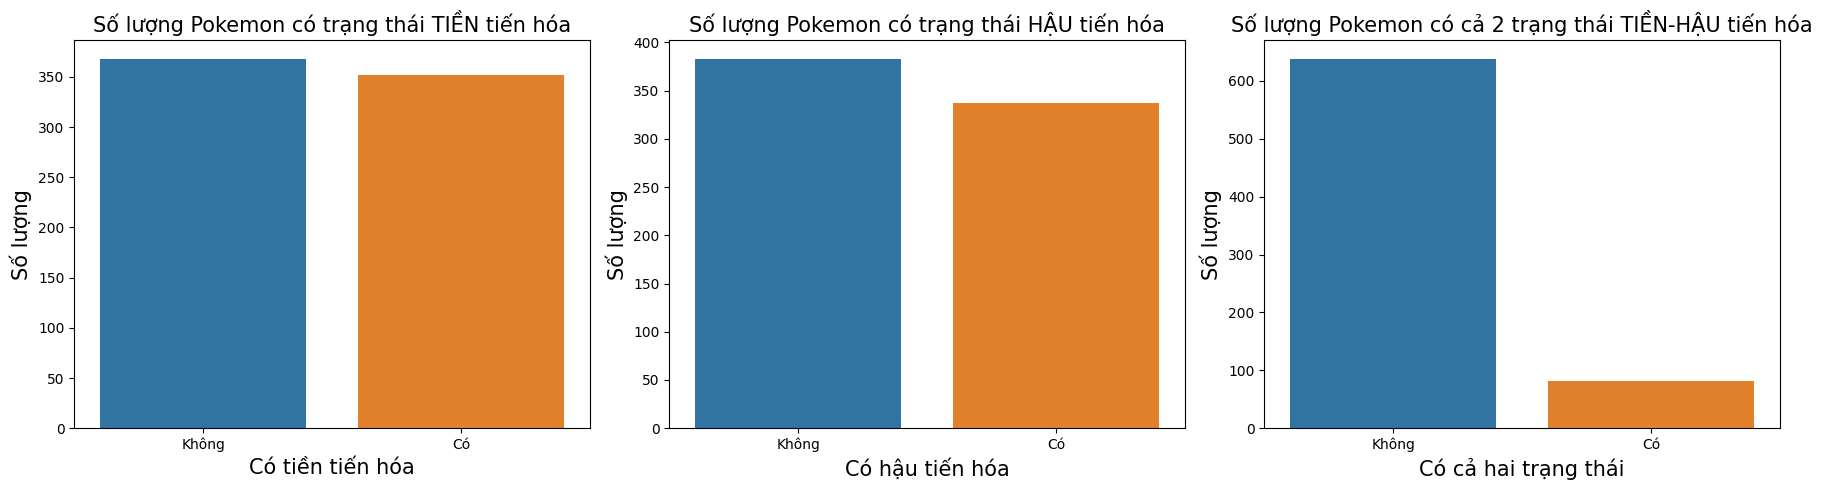

In [13]:
# Tạo cột xác định các Pokemon vừa có tiền tiến hóa vừa có hậu tiến hóa
data['BOTH_EVO'] = data['PRE.EVO'].notna() & data['POST.EVO'].notna()

# Số lượng Pokemon có trạng thái TIỀN tiến hóa
pre_evo_counts = data['PRE.EVO'].notna().value_counts()

# Số lượng Pokemon có trạng thái HẬU tiến hóa
post_evo_counts = data['POST.EVO'].notna().value_counts()

# Số lượng Pokemon có cả tiền tiến hóa và hậu tiến hóa
both_evo_counts = data['BOTH_EVO'].value_counts()

# Tạo figure và các trục con
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Biểu đồ 1: Số lượng Pokemon có trạng thái TIỀN tiến hóa
sns.barplot(ax=axes[0], x=pre_evo_counts.index, y=pre_evo_counts.values)
axes[0].set_title('Số lượng Pokemon có trạng thái TIỀN tiến hóa', fontsize=15)
axes[0].set_xlabel('Có tiền tiến hóa', fontsize=15)
axes[0].set_ylabel('Số lượng', fontsize=15)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Không', 'Có'])

# Biểu đồ 2: Số lượng Pokemon có trạng thái HẬU tiến hóa
sns.barplot(ax=axes[1], x=post_evo_counts.index, y=post_evo_counts.values)
axes[1].set_title('Số lượng Pokemon có trạng thái HẬU tiến hóa', fontsize=15)
axes[1].set_xlabel('Có hậu tiến hóa', fontsize=15)
axes[1].set_ylabel('Số lượng', fontsize=15)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Không', 'Có'])

# Biểu đồ 3: Số lượng Pokemon có cả tiền tiến hóa và hậu tiến hóa
sns.barplot(ax=axes[2], x=both_evo_counts.index, y=both_evo_counts.values)
axes[2].set_title('Số lượng Pokemon có cả 2 trạng thái TIỀN-HẬU tiến hóa', fontsize=15)
axes[2].set_xlabel('Có cả hai trạng thái', fontsize=15)
axes[2].set_ylabel('Số lượng', fontsize=15)
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Không', 'Có'])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

- Có khoảng `350/720` Pokemon là có trạng thái `tiền` tiến hóa.

- Khoảng `340/720` Pokemon là có trạng thái `hậu` tiến hóa.

- Khoảng `90/720` Pokemon có cả 2 trạng thái `tiền-hậu` tiến hóa.

=> Với những pokemon có trạng thái tiến hóa (ở bất kỳ dạng nào: tiền, hậu, hoặc cả 2), ta có thể kết luận chắc chắn rằng chúng không phải là một Pokemon huyền thoại.

---

### Giới thiệu Dataset 2: tổng hợp hình ảnh của các pokemon

Dữ liệu này chứa hơn 800 bức ảnh Pokemon, được lấy từ Dataset `Pokemon Image Dataset` trên Kaggle và sẽ được sử dụng trong phần này để vẽ biểu đồ tiến hóa cho các pokemon.

Data source: https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types/data

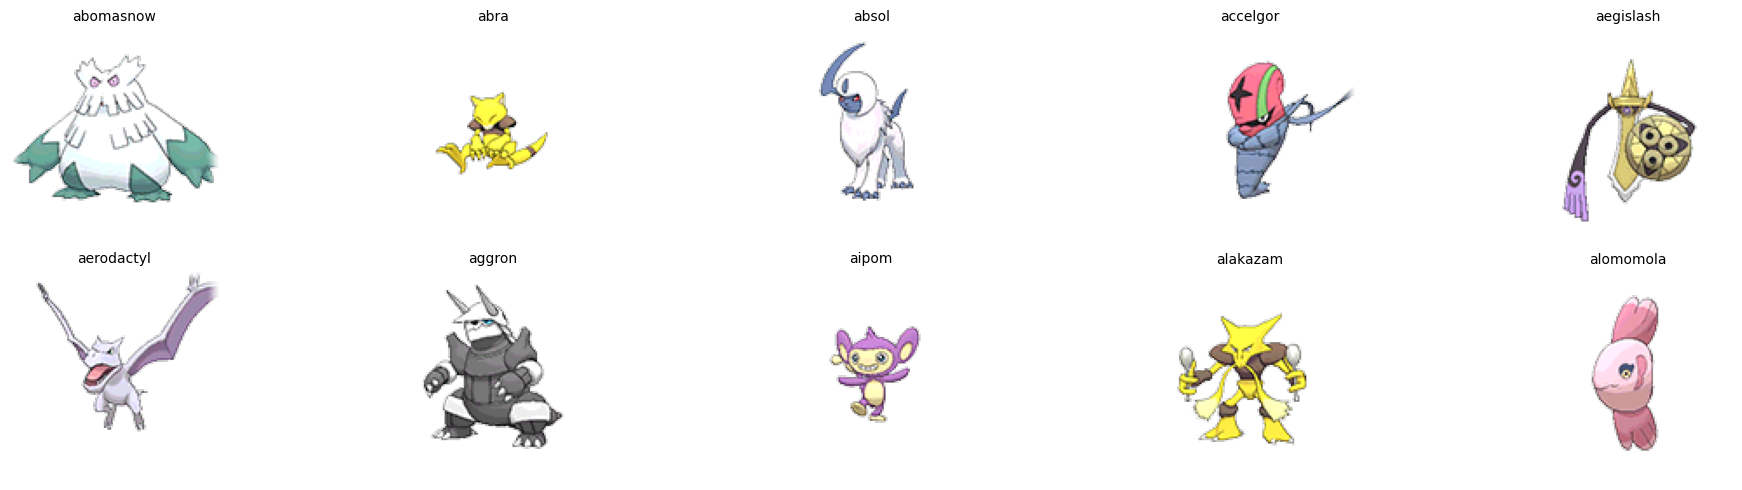

In [14]:
# một số hình ảnh trong dataset

import os
import matplotlib.pyplot as plt
from PIL import Image

data2_path = "/kaggle/input/720-csv-pokemon-and-images/pokemon_data/images/"

# hàm hiển thị ảnh trong dataset
def display_first_10_images():
    # Lấy danh sách tất cả các tệp hình ảnh trong thư mục
    image_files = [f for f in os.listdir(data2_path) if os.path.isfile(os.path.join(data2_path, f))]
    
    # Sắp xếp danh sách theo thứ tự bảng chữ cái
    image_files.sort()
    
    # Chọn 10 tệp đầu tiên từ danh sách đã sắp xếp
    first_10_images = image_files[:10]
    
    # Hiển thị 10 bức ảnh đó
    fig, axes = plt.subplots(2, 5, figsize=(20, 5))
    axes = axes.flatten()
    
    for ax, image_file in zip(axes, first_10_images):
        image_path = os.path.join(data2_path, image_file)
        image = Image.open(image_path)
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(os.path.splitext(image_file)[0], fontsize=10)
    
    plt.tight_layout()
    plt.show()

display_first_10_images()

Đây là hình ảnh của 10 pokemon đầu tiên trong dataset có tên được sắp xếp theo bảng chữ cái

### Xác định xem Pokemon có hình thức tiến hóa nào không

Thông tin của Pokemon:
ID                  25
NAME           pikachu
TYPE1         electric
TYPE2              NaN
PRE.EVO            NaN
POST.EVO        raichu
GENERATION           1
TOTAL              320
HP                  35
ATTACK              55
DEFENSE             40
SP.ATK              50
SP.DEF              50
SPEED               90
LEGENDARY        False
Name: 24, dtype: object


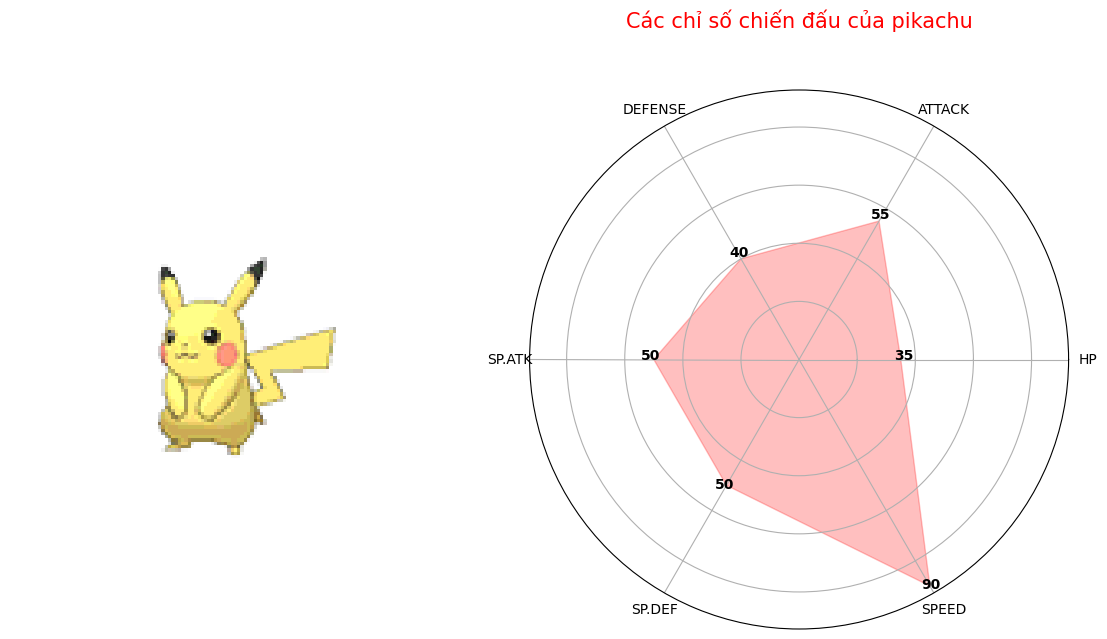

Evolution chart của Pokemon:


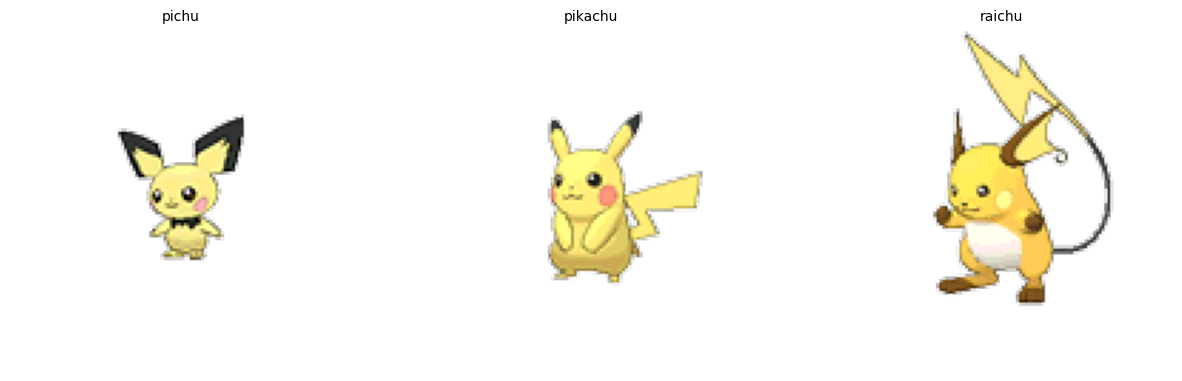

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from PIL import Image
import os

# Đường dẫn đến các tệp dữ liệu
data1_path = "/kaggle/input/720-csv-pokemon-and-images/pokemon_data/pokemon_data.csv"
data2_path = "/kaggle/input/720-csv-pokemon-and-images/pokemon_data/images/"

# Đọc dữ liệu
data1 = pd.read_csv(data1_path)

# Hàm hiển thị thông tin pokemon với đầu vào là tên hoặc id của pokemon
def display_pokemon_info(pokemon_name_or_id):
    if pokemon_name_or_id.isdigit():
        pokemon_info = data1[data1['ID'] == int(pokemon_name_or_id)]
    else:
        pokemon_info = data1[data1['NAME'].str.lower() == pokemon_name_or_id.lower()]
    
    if pokemon_info.empty:
        print("Không tìm thấy thông tin cho Pokemon này.")
        return
    
    pokemon_info = pokemon_info.iloc[0]  # Chọn hàng đầu tiên nếu có nhiều hơn một kết quả
    
    print("Thông tin của Pokemon:")
    print(pokemon_info)
    
    # Hiển thị hình ảnh của Pokemon và radar chart
    image_path = os.path.join(data2_path, f"{pokemon_info['NAME'].lower()}.png")
    
    stats_labels = ['HP', 'ATTACK', 'DEFENSE', 'SP.ATK', 'SP.DEF', 'SPEED']
    stats_values = [pokemon_info[label] for label in stats_labels]
    
    angles = np.linspace(0, 2 * np.pi, len(stats_labels), endpoint=False).tolist()
    stats_values += stats_values[:1]
    angles += angles[:1]
    
    fig = plt.figure(figsize=(14, 7))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.5])

    if os.path.exists(image_path):
        pokemon_image = Image.open(image_path)
        ax0 = plt.subplot(gs[0])
        ax0.imshow(pokemon_image)
        ax0.axis('off')
    else:
        print("Không tìm thấy hình ảnh cho Pokemon này.")
    
    ax1 = plt.subplot(gs[1], polar=True)
    ax1.fill(angles, stats_values, color='red', alpha=0.25)
    ax1.set_yticklabels([])
    ax1.set_xticks(angles[:-1])
    ax1.set_xticklabels(stats_labels)
    
    for angle, value, label in zip(angles, stats_values, stats_labels):
        ax1.text(angle, value + 1, f'{value}', horizontalalignment='center', size=10, color='black', weight='semibold')
    
    plt.title(f"Các chỉ số chiến đấu của {pokemon_info['NAME']}", size=15, color='red', y=1.1)
    plt.show()
    
    # Hiển thị evolution chart
    pre_evo = pokemon_info['PRE.EVO']
    post_evo = pokemon_info['POST.EVO']
    
    evolution_chain = []
    
    # Tìm pre.evo của Pokemon, nếu không có pre.evo, tìm post.evo của pokemon khác trong dataset
    if not pd.isna(pre_evo) and pre_evo != "":
        evolution_chain.append(pre_evo)
    else:
        post_evo_pokemon = data1[data1['POST.EVO'] == pokemon_info['NAME']]
        if not post_evo_pokemon.empty:
            evolution_chain.append(post_evo_pokemon.iloc[0]['NAME'])
    
    # Thêm Pokemon hiện tại vào danh sách
    evolution_chain.append(pokemon_info['NAME'])
    
    # Tìm post.evo của Pokemon (nếu có)
    if not pd.isna(post_evo) and post_evo != "":
        evolution_chain.append(post_evo)
    
    if evolution_chain:
        print("Evolution chart của Pokemon:")
        fig, ax = plt.subplots(1, len(evolution_chain), figsize=(15, 5))
        for i, pokemon_name in enumerate(evolution_chain):
            evolution_image_path = os.path.join(data2_path, f"{pokemon_name.lower()}.png")
            if os.path.exists(evolution_image_path):
                evolution_image = Image.open(evolution_image_path)
                ax[i].imshow(evolution_image)
                ax[i].axis('off')
                ax[i].set_title(pokemon_name, size=10)
            else:
                print(f"Không tìm thấy hình ảnh cho {pokemon_name}.")
        plt.show()

# Sử dụng hàm để hiển thị thông tin của Pokémon
display_pokemon_info('pikachu')

- Việc có thể tìm kiếm pokemon theo tên hoặc id sẽ giải quyết được vấn đề rằng khi chúng ta muốn xem thông tin của một pokemon nào đó mà không nhớ rõ tên hoặc đơn giản là muốn xem thông tin của pokemon bất kì.

- Dựa trên việc vẽ radar chart và biểu đồ tiến hóa, ta có thể thấy được các chỉ số chiến đấu và trạng thái tiến hóa của pokemon một cách trực quan bằng hình ảnh/biểu đồ mà không cần phải tìm đọc trong dataset.

- Với biểu đồ tiến hóa (evolution chart), có thể dễ dàng biết được pokemon hiện tại có hình thức tiến hóa nào hay không, nếu có thì hình thức tiến hóa của chúng là gì, trở thành pokemon nào và có hình dạng như thế nào. Tất cả chúng đều được thể hiện trong biểu đồ tiến hóa, bởi vì không phải pokemon nào cũng có cả 2 hình thức là tiền tiến hóa và hậu tiến hóa, có những pokemon chỉ có một trong hai trạng thái, có những pokemon không có trạng thái tiến hóa nào (ví dụ như pokemon legendary). Tất nhiên, không phải cứ không có trạng thái tiến hóa thì đều là pokemon legendary, nó cần nhiều yếu tố để xem xét hơn như đã chỉ ra ở mục 3: dự đoán pokemon huyền thoại.

=> Có thể áp dụng phương pháp này để xây dựng một ứng dụng đơn giản để hiển thị thông tin cũng như vẽ các biểu đồ cho pokemon. 

Tham khảo demo ứng dụng tại: https://github.com/AnhhDaoo/Pokemon_Virtualize/blob/main/src/infor_evoChart.py

---
# 5. Kết luận
---
#### Với các công việc đã thực hiện trong Notebook:

- 1. Tìm hiểu Dataset về Pokemon.

- 2. Phân tích và trực quan hóa thông tin của Pokemon.

- 3. Dự đoán Pokemon huyền thoại dựa trên các chỉ số chiến đấu.

- 4. Xác định những loại hình thức tiến hóa sẽ có dựa trên các hình thức tiền tiến hóa.

#### Có thể đưa ra kết luận:

- Các bước này không chỉ giúp hiểu sâu hơn về dữ liệu Pokemon, mà còn áp dụng các kỹ thuật phân tích dữ liệu và học máy để đưa ra các dự đoán và phân tích có giá trị. Điều này có thể giúp trong việc nghiên cứu, phát triển các sản phẩm game hoặc đơn giản là tăng thêm hiểu biết về thế giới Pokemon.

- Với độ chính xác cao (lên tới 99%) của các mô hình trong việc dự đoán Pokemon huyền thoại, có thể kết luận rằng các chỉ số chiến đấu có thể xác định khách quan liệu một Pokemon có phải là huyền thoại hay không. Tuy nhiên các mô hình này vẫn chưa được huấn luyện với một thành phần khác là trạng thái tiến hóa (thành phần này vẫn chưa được thêm vào dataset dưới dạng số nên chưa thêm được vào các mô hình dự đoán), và số lượng pokemon huyền thoại trong dataset được huấn luyện là rất ít. Để khắc phục vấn đề này cũng như cải thiện hiệu suất mô hình sao cho đúng với các đặc tính của pokemon huyền thoại, dataset cần được mở rộng hơn và thuật toán huấn luyện cần được cải thiện thêm trong tương lai.

- Việc vẽ ra biểu đồ thể hiện các chỉ số và in ra thông tin của pokemon giúp người chơi game có thể lên kế hoạch chiến lược và tối ưu hóa đội hình chiến đấu dựa trên chỉ số và loại pokemon. Ngoài ra, người chơi còn có thể sử dụng các thông tin về biểu đồ tiến hóa để phục vụ cho việc sưu tầm hoặc huấn luyện pokemon.

# Mã nguồn dự án

Written by: Bùi Thị Anh Đào – 21012864

Link notebook: https://www.kaggle.com/code/anhhdaoo/pokemon-virtualize/notebook

Link dataset: https://www.kaggle.com/datasets/anhhdaoo/720-csv-pokemon-and-images/data 

Full project: https://github.com/AnhhDaoo/Pokemon_Virtualize 
